# Questions

1) What is the difference between the SVM method and a neural network, assuming that both work with the same number of training samples N?

   Your answer: 
1. In simplest manner, svm without kernel is a single neural network neuron but with different cost function. If you add a kernel function, then it is comparable with 2 layer neural nets. First layer is able to project data into some other space and next layer classifies the projected data. If you force to have one more layer then you might ensemble multiple kernel svms then you mimics 3 layer neural network.
2. Neural network tries to find the parameters which minimize the mean squared prediction error with respect to a set of training examples. It uses the stochastic gradient descent optimization algorithm to do this. SVM's on the other hand try to minimize both training error and some measure of "hypothesis complexity".
3. NNs are heuristic, while SVMs are theoretically founded. A SVM is guaranteed to converge towards the best solution in the probably approximately correct sense. For example, for two linearly separable classes SVM will draw the separating hyperplane directly halfway between the nearest points of the two classes (these become support vectors). A neural network would draw any line which separates the samples, which is correct for the training set, but might not have the best generalization properties.
4. In case of linearly non-separable classes, both SVMs and NNs apply non-linear projection into higher-dimensional space. In the case of NNs this is achieved by introducing additional neurons in the hidden layer(s). For SVMs, a kernel function is used to the same effect. A neat property of the kernel function is that the computational complexity doesn't rise with the number of dimensions, while for NNs it obviously rises with the number of neurons.
5. Another big difference between the two methods is that stochastic gradient descent isn't guaranteed to find the optimal set of parameters when used the way NN implementations employ it. However, any decent SVM implementation is going to find the optimal set of parameters. People like to say that neural networks get stuck in a local minima while SVMs don't.

2) Why is the ReLU activation function used the most often in neural networks for computer vision?

   Your answer: 
1.  Empirically found to converge faster than sigmoid or tanh.
2. Gradient won’t saturate in the positive region
3. Computationally very efficient as simple thresholding is required
 

3) Describe your best model in the implementation of the two-layer neural network. Describe your starting point, how you tuned  the hyperparameters, which stategies you did you use to improve the network, show the results of intermediate and final steps.

   Your answer:
1. Starting point:
 Following are the starting parameters and accuracy:
 input_dim=3072, hidden_dim=100, num_classes=10, reg=0.25, weight_scale=1e-3, num_epoch = 10, batch_size = 500, lr = 1e-3
 Initial accuracy: 48.47%
 
2. Batch size and hidden units:
 First I reduced batch size and increased number of hidden units and observed some increase in accuracy and obtained 51.68 test accuracy.
 Test accu = 51.68%

3. Learning rate:
 Then I tried to increase learning rate to 1e-2 but then loss became infinity so I reduced learning rate to 1e-4 then accuracy decreases. So then I tried some intermediate values - 3e-4, 7e-4 but accuracy was less. So no point in changing learning rate.

4. Regularization:
 After learning rate I tried changing regularization but it didn't helped. I used 0, 0.5 and 0.75 as regularization factor but as accuracy was similar.
 reg = 0, Test accu = 51.5%
 reg = 0.5, Test accu = 51.22%
 
5. Epoch:
 Then I thought that since training accuracy is constantly increasing even after 10 epochs so increasing number of epochs would work. I tried 20, 50 and 100 epochs and results were as follows:
 epochs = 20, Test accu = 53.09
 epochs = 50, Test accu = 53.97
 epochs = 100, Test accu = 54.37
   

4) **Cross validation** is a technique used to prove the generalization ability of a model and can help you find a robust set of hyperparameters. Please describe the implementation details of **k-fold cross validation** if you want to use it to find a best set of hyperparameter of the **Linear SVM classification** problem.

   Your answer:
1. Partition your training set into the k-folds, so if k=5 then split the training set into five parts. 
2. Train your model decide hyperparameters, perhaps in your SVM the soft constraint parameter C and the kernel parameter γ
 by looking at how it performs with different hyperparameters when you run it on the combination four parts and validate against the fifth part - each run doing this five times, against each of the folds. Choose the hyperparameters which give the optimal results in this cross-validation.
3. Run your model, using the chosen hyperparmeters, on the whole training set. This is your final model.
4. Test (once only) your final model on the test set to see how accurate/sensitive/specific it is on what is designed to represent out-of-sample data.

### Following are the screenshots for question 3

After step 2 - batch size = 200 and hidden units = 300

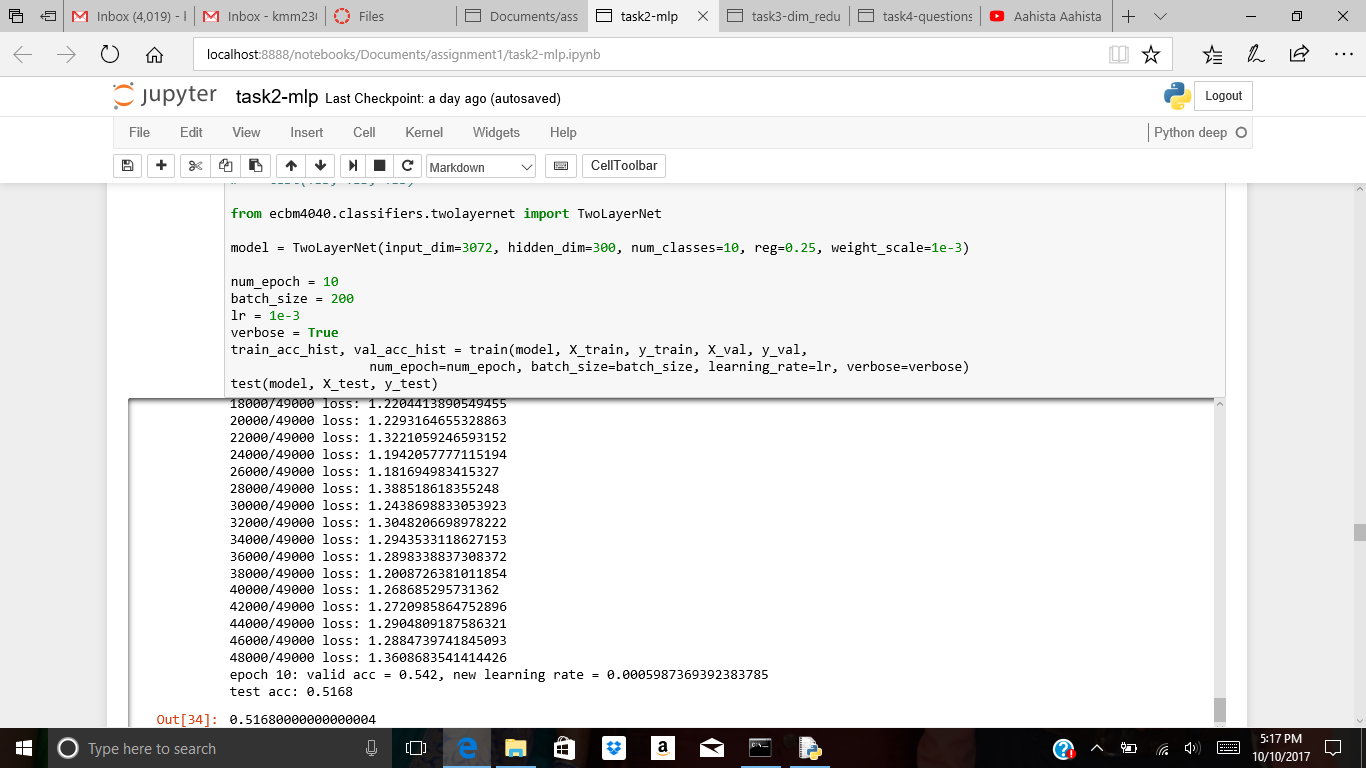

In [4]:
from IPython.display import Image
Image("C:/Users/kmmeh/Documents/reg_025.png")

This is for regularization = 0.5

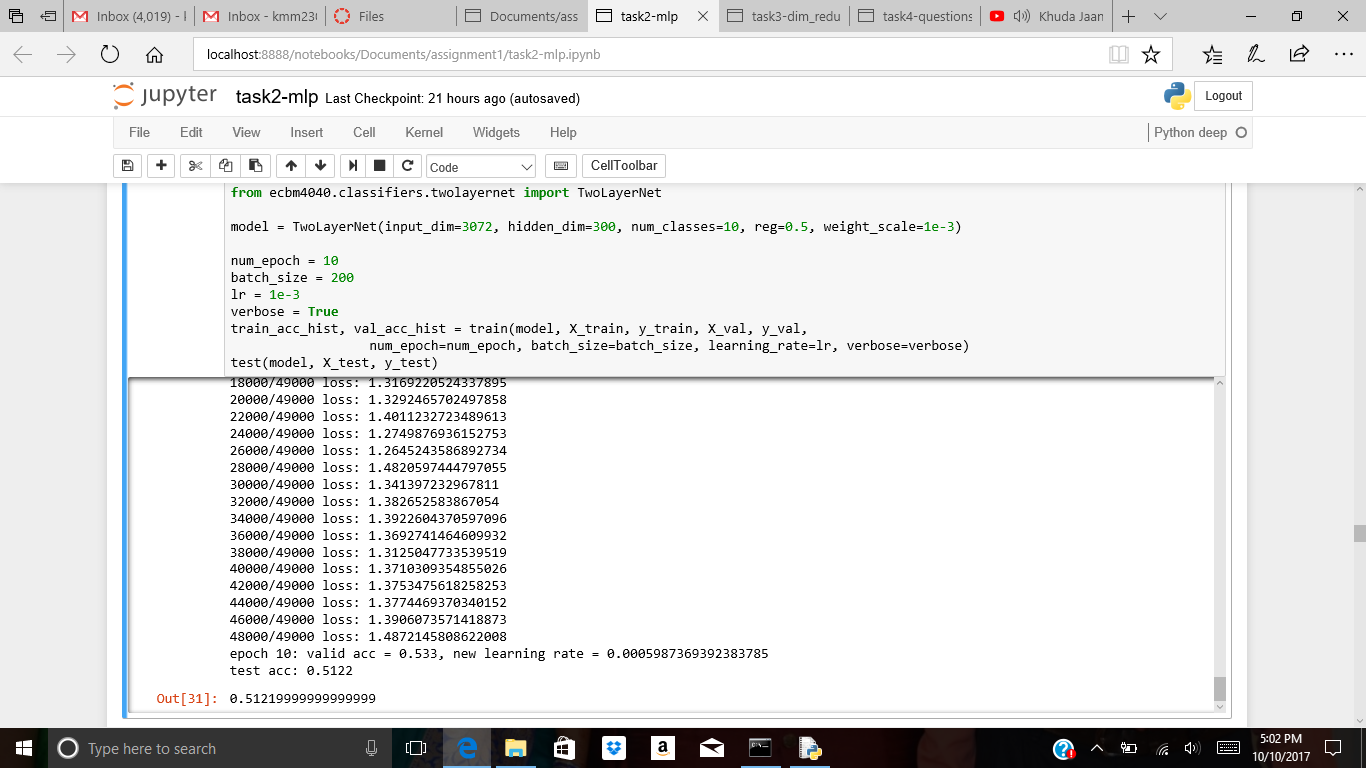

In [2]:
from IPython.display import Image
Image("C:/Users/kmmeh/Documents/reg_05.png")

At last step following screenshots are for epochs = 20 and epochs = 50

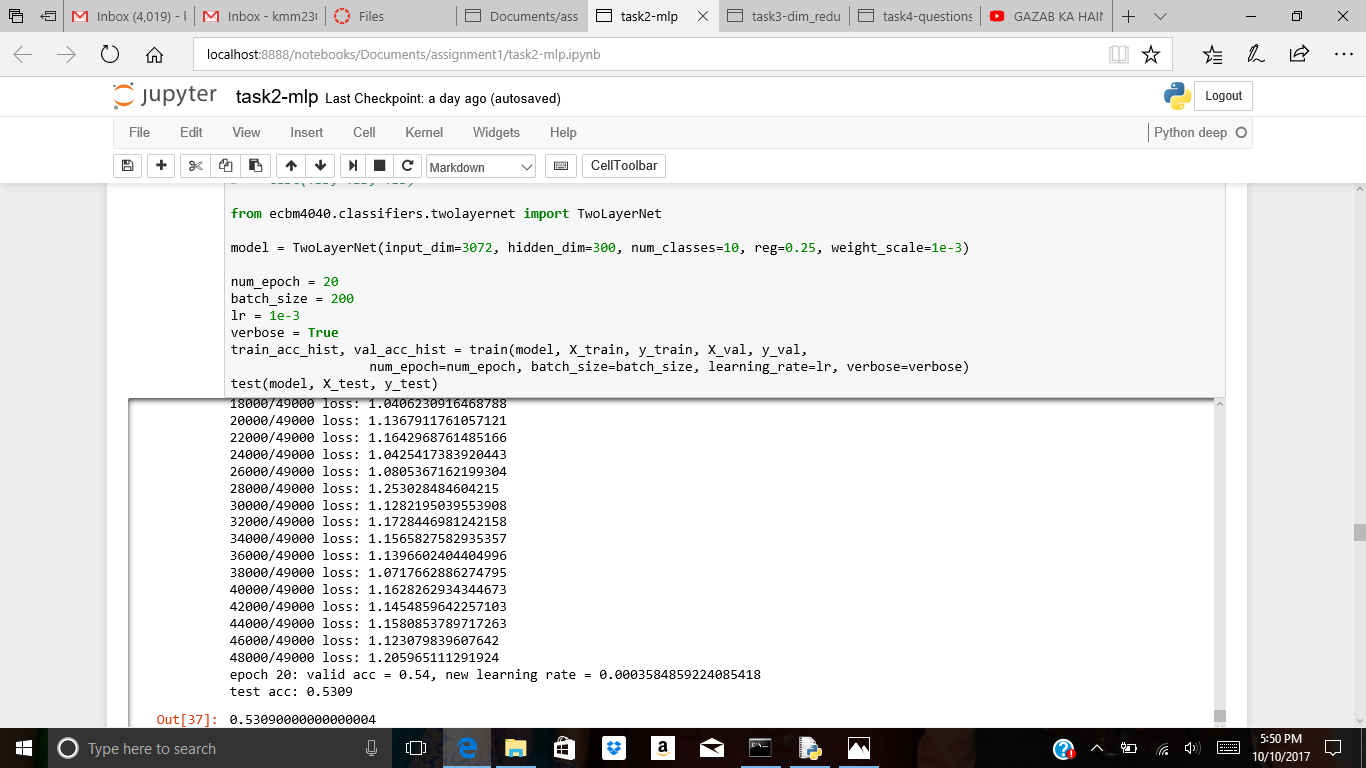

In [5]:
from IPython.display import Image
Image("C:/Users/kmmeh/Documents/epoch_20.png")

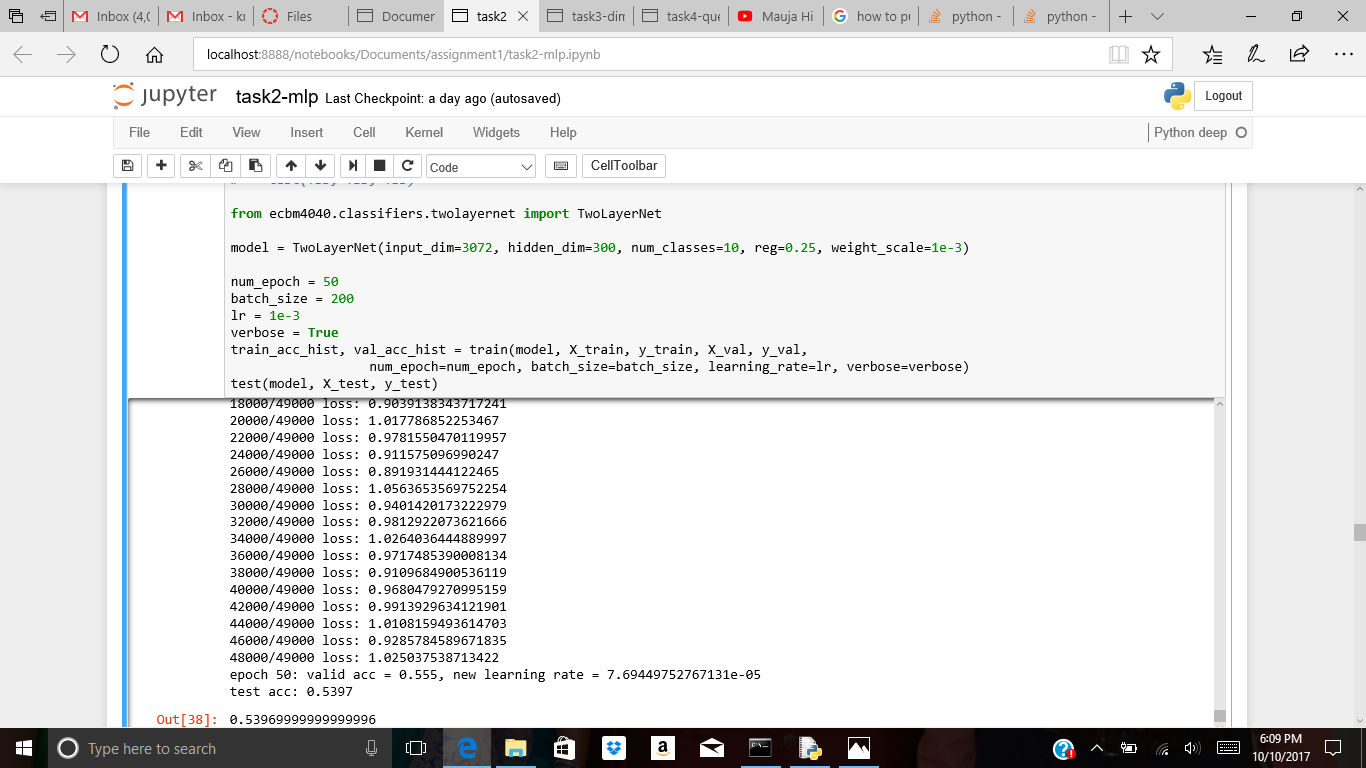

In [6]:
from IPython.display import Image
Image("C:/Users/kmmeh/Documents/epoch_50.png")

Final output as follows for 
input_dim=3072, hidden_dim=300, num_classes=10, reg=0.25, weight_scale=1e-3, num_epoch = 100, batch_size = 200, lr = 1e-3

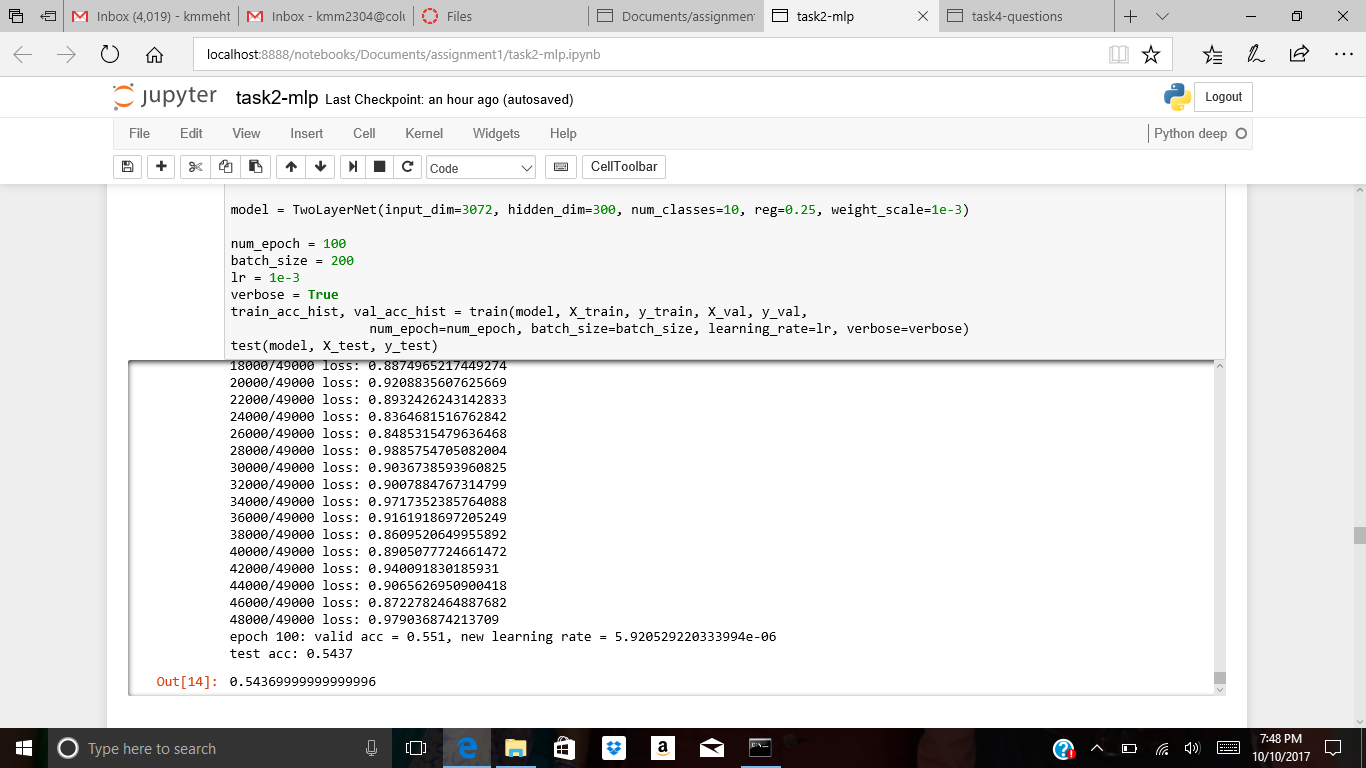

In [2]:
from IPython.display import Image
Image("C:/Users/kmmeh/Documents/epoch_100.png")